## 1. Read images/files and labeling

## 2. Data Augmentation


In [6]:
import numpy as np
import pandas as pd
import cv2 as cv

from matplotlib.image import imread
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

### Read data

los datos en esta carpeta tienen unas característicass especiales, son de 3 clases (preview, sombra y normal):


In [7]:
os.getcwd() + os.sep + "documentation" + os.sep + 'Alemania' + os.sep + 'Train' + os.sep + '0'

'c:\\Users\\barke\\OneDrive\\Escritorio\\EDA\\MLProyectSpeedSigns\\documentation\\Alemania\\Train\\0'

In [8]:
data_path = os.getcwd() + os.sep + "documentation" + os.sep + 'Alemania' + os.sep + 'Train' + os.sep + '0'
only_image_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]
only_image_names

['00000_00000_00000.png',
 '00000_00000_00001.png',
 '00000_00000_00002.png',
 '00000_00000_00003.png',
 '00000_00000_00004.png',
 '00000_00000_00005.png',
 '00000_00000_00006.png',
 '00000_00000_00007.png',
 '00000_00000_00008.png',
 '00000_00000_00009.png',
 '00000_00000_00010.png',
 '00000_00000_00011.png',
 '00000_00000_00012.png',
 '00000_00000_00013.png',
 '00000_00000_00014.png',
 '00000_00000_00015.png',
 '00000_00000_00016.png',
 '00000_00000_00017.png',
 '00000_00000_00018.png',
 '00000_00000_00019.png',
 '00000_00000_00020.png',
 '00000_00000_00021.png',
 '00000_00000_00022.png',
 '00000_00000_00023.png',
 '00000_00000_00024.png',
 '00000_00000_00025.png',
 '00000_00000_00026.png',
 '00000_00000_00027.png',
 '00000_00000_00028.png',
 '00000_00000_00029.png',
 '00000_00001_00000.png',
 '00000_00001_00001.png',
 '00000_00001_00002.png',
 '00000_00001_00003.png',
 '00000_00001_00004.png',
 '00000_00001_00005.png',
 '00000_00001_00006.png',
 '00000_00001_00007.png',
 '00000_0000

In [23]:
data_path = os.getcwd() + os.sep + "documentation" + os.sep + 'Alemania' + os.sep + 'Train' + os.sep + '0' + os.sep 
only_image_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]
images_no_mask = {}
images_mask_wb = {}
images_mask_color = {}
df_dict = []
for image_name in only_image_names:
    if ".png" in image_name:
        image_fullpath = data_path + image_name
        image_cv = cv.imread(image_fullpath)     # con el 0 se lee en blanco y negro, sin nada, se lee en color
        image_cv = cv.resize(image_cv, (144, 144))  # las imagenes originales tienen tamañanos distintos (256,211) o (211, 256) -> con esta función se ponen en el tamaño común (que tiene que ser el mínimo de ambas)
        #print(image_cv.shape)
        if "msk" in image_name:
            df_dict.append({"Image":image_cv, "Label":1, "Fullpath":image_fullpath })
            #images_mask_wb[image_fullpath] = 1
        elif "preview" in image_name:
            df_dict.append({"Image":image_cv, "Label":2, "Fullpath":image_fullpath})
            #images_mask_color[image_fullpath] = 2
        else:
            df_dict.append({"Image":image_cv, "Label":0, "Fullpath":image_fullpath})
            #images_no_mask[image_fullpath] = 0
        

df = pd.DataFrame(df_dict)
df.head(10)

,Image,Label,Fullpath
0,"[[[80, 78, 75], [80, 78, 75], [80, 78, 75], [8...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
1,"[[[73, 73, 69], [73, 73, 69], [73, 73, 69], [7...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
2,"[[[72, 72, 72], [72, 72, 72], [72, 72, 72], [7...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
3,"[[[67, 67, 68], [67, 67, 68], [67, 67, 68], [6...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
4,"[[[75, 73, 73], [75, 73, 73], [75, 73, 73], [7...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
5,"[[[68, 68, 67], [68, 68, 67], [68, 68, 67], [6...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
6,"[[[63, 63, 67], [63, 63, 67], [63, 63, 67], [6...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
7,"[[[67, 67, 64], [67, 67, 64], [67, 67, 64], [6...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
8,"[[[94, 92, 107], [94, 92, 107], [98, 95, 114],...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...
9,"[[[66, 67, 69], [66, 67, 69], [67, 68, 74], [6...",0,c:\Users\barke\OneDrive\Escritorio\EDA\MLProye...


In [27]:
# se extraen los datos del dataframe para convertirlos en analizables
X = np.stack(np.array(df["Image"]))
y = np.array(df["Label"])
print(X.shape)
print(y.shape)

(210, 144, 144, 3)
(210,)


In [28]:
X[0].shape

(144, 144, 3)

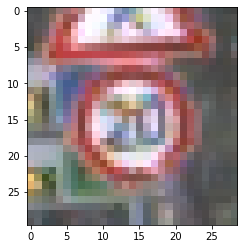

In [29]:
#imagen original 
image = imread(df["Fullpath"][0])
plt.imshow(image)
plt.show()

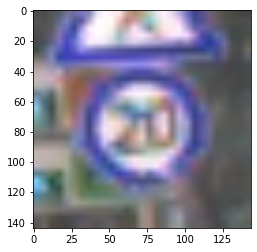

In [30]:
#imagen procesada (tamaño estandar 211-211)
from PIL import Image


img = Image.fromarray(X[0])
plt.imshow(img)
plt.show()


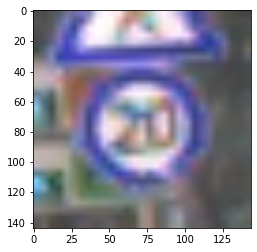

In [33]:
img2 = Image.fromarray(np.array(df["Image"][0]))
plt.imshow(img2)
plt.show()

In [31]:
X.shape

(210, 144, 144, 3)

In [32]:
# se añade unna dimensión para hacerla analizable
X_train = X.reshape(210,144,144,3,1)
X_train.shape

(210, 144, 144, 3, 1)

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)